In [ ]:
# 폰트 설치
import matplotlib.font_manager as fm
!apt-get -qq -y install fonts-nanum > /dev/null
fontpath = '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf' 
font = fm.FontProperties(fname=fontpath, size=9)
fm._rebuild()

In [ ]:
# 런타임 재시작 
import os 
os.kill(os.getpid(), 9)

In [ ]:
# 한글 폰트 설정
import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib.font_manager as fm

# 마이너스 표시 문제
mpl.rcParams['axes.unicode_minus'] = False
	
# 한글 폰트 설정
path = '/usr/share/fonts/truetype/nanum/NanumGothicBold.ttf'
font_name = fm.FontProperties(fname=path, size=18).get_name()
plt.rc('font', family=font_name)
fm._rebuild()

In [ ]:
import pandas as pd 
import seaborn as sns

# 데이터 프레임 생성
df = pd.read_csv('/content/crime.csv',encoding='cp949')
df.head()

,범죄대분류,범죄중분류,0시00분-02시59분,03시00분-05시59분,06시00분-08시59분,09시00분-11시59분,12시00분-14시59분,15시00분-17시59분,18시00분-20시59분,21시00분-23시59분,미상,일,월,화,수,목,금,토
0,강력범죄,살인기수,15,21,20,28,38,33,43,49,50,38,45,48,40,37,49,40
1,강력범죄,살인미수등,33,50,29,44,46,60,66,82,72,71,70,68,62,73,85,53
2,강력범죄,강도,105,131,44,59,68,72,81,107,131,111,113,116,105,124,121,108
3,강력범죄,강간,630,885,417,293,325,311,425,719,1305,869,686,734,719,682,722,898
4,강력범죄,유사강간,102,110,57,62,60,55,66,89,181,145,99,109,92,89,112,136


In [ ]:
# 요일 항목만 남기고 제거한 wdf 구하기
wdf = df.drop(['범죄중분류',
               '0시00분-02시59분','03시00분-05시59분','06시00분-08시59분',
               '09시00분-11시59분','12시00분-14시59분','15시00분-17시59분',
               '18시00분-20시59분','21시00분-23시59분','미상'], axis=1)

# 범죄대분류 별로 합계를 구해 요일별로 저장
wdf = wdf.groupby('범죄대분류').sum()

# 행, 열 전환
wdf = wdf.transpose()

wdf

범죄대분류,강력범죄,교통범죄,기타범죄,노동범죄,마약범죄,병역범죄,보건범죄,선거범죄,안보범죄,절도범죄,지능범죄,특별경제범죄,폭력범죄,풍속범죄,환경범죄
일,4081,47698,25278,85,789,111,934,65,36,25466,29037,3948,45295,2529,168
월,3519,51459,39244,162,1278,3068,2051,90,25,26239,64776,8724,38034,3063,749
화,3607,53605,37277,139,1352,3580,2096,91,13,25671,63173,8608,38553,3130,696
수,3634,54509,36996,168,1219,1940,1962,100,22,26061,62642,8477,38905,3303,652
목,3445,54846,37250,175,1195,2082,2043,113,25,26098,63327,8432,39086,3204,653
금,3880,58103,37367,143,1272,1834,2085,95,24,28156,64724,8502,41198,3273,696
토,4310,57134,26756,103,933,97,1399,57,24,29266,33854,4709,46842,2651,263


**범죄 발생이 가장 많은 요일은 금요일로 확인**

**범죄 발생이 가장 적은 요일은 일요일로 확인**

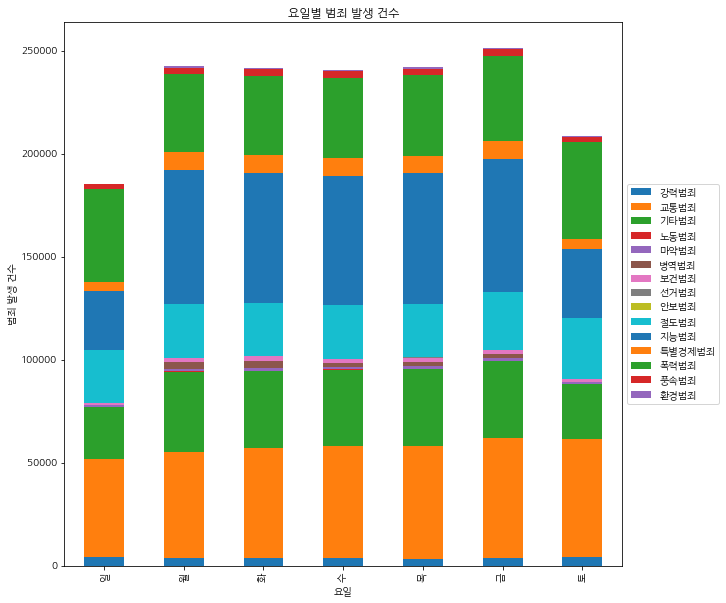

In [ ]:
wdf.plot(kind='bar', stacked='True', figsize=(10, 10))

plt.title('요일별 범죄 발생 건수')
plt.xlabel('요일')
plt.ylabel('범죄 발생 건수')

plt.legend(loc='center left', bbox_to_anchor=(1, 0.5)) # 범주 박스 위치 지정

plt.show()

In [ ]:
wdf2 = wdf

# pie차트를 그리기 위해 sum이라는 열을 추가하여 계산
wdf2['sum'] = wdf2['강력범죄']+wdf2['교통범죄']+wdf2['기타범죄']+wdf2['노동범죄']+wdf2['마약범죄']+wdf2['병역범죄']+wdf2['보건범죄']+wdf2['선거범죄']+wdf2['안보범죄']+wdf2['절도범죄']+wdf2['지능범죄']+wdf2['특별경제범죄']+wdf2['폭력범죄']+wdf2['풍속범죄']+wdf2['환경범죄']

wdf2

범죄대분류,강력범죄,교통범죄,기타범죄,노동범죄,마약범죄,병역범죄,보건범죄,선거범죄,안보범죄,절도범죄,지능범죄,특별경제범죄,폭력범죄,풍속범죄,환경범죄,sum
일,4081,47698,25278,85,789,111,934,65,36,25466,29037,3948,45295,2529,168,185520
월,3519,51459,39244,162,1278,3068,2051,90,25,26239,64776,8724,38034,3063,749,242481
화,3607,53605,37277,139,1352,3580,2096,91,13,25671,63173,8608,38553,3130,696,241591
수,3634,54509,36996,168,1219,1940,1962,100,22,26061,62642,8477,38905,3303,652,240590
목,3445,54846,37250,175,1195,2082,2043,113,25,26098,63327,8432,39086,3204,653,241974
금,3880,58103,37367,143,1272,1834,2085,95,24,28156,64724,8502,41198,3273,696,251352
토,4310,57134,26756,103,933,97,1399,57,24,29266,33854,4709,46842,2651,263,208398


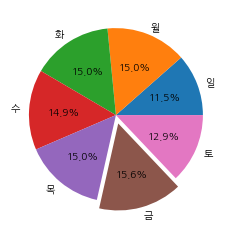

In [ ]:
import matplotlib.pyplot as plt

explode = [0, 0, 0, 0, 0, 0.10, 0] # '금요일'이 제일 높으므로 중앙에서 분리하여 강조
plt.pie(wdf2['sum'], labels=['일','월','화','수','목','금','토'],autopct='%.1f%%', explode=explode)
plt.show()

In [ ]:
# 시간 항목만 남기고 제거한 wdf 구하기
hdf = df.drop(['범죄중분류',
               '월','화','수',
               '목','금','토', '일', '미상'], axis=1)

# 범죄대분류 별로 합계를 구해 요일별로 저장
hdf = hdf.groupby('범죄대분류').sum()

# 행, 열 전환
hdf = hdf.transpose()

hdf

범죄대분류,강력범죄,교통범죄,기타범죄,노동범죄,마약범죄,병역범죄,보건범죄,선거범죄,안보범죄,절도범죄,지능범죄,특별경제범죄,폭력범죄,풍속범죄,환경범죄
0시00분-02시59분,2920,24513,10376,20,244,3,596,0,2,13088,8393,1688,31290,920,42
03시00분-05시59분,3316,23438,9184,41,214,1,404,1,0,14167,6637,1426,26880,709,53
06시00분-08시59분,1977,37189,9935,80,151,20,140,22,0,13094,5971,1333,17572,887,117
09시00분-11시59분,1799,44265,31337,124,635,1440,880,121,10,21501,49269,6702,23112,1582,458
12시00분-14시59분,1966,45675,22841,125,773,285,694,53,18,27167,38231,5340,23919,1713,290
15시00분-17시59분,2447,53506,20037,117,890,55,1009,34,10,28553,28941,4802,28939,2577,190
18시00분-20시59분,3089,58164,18200,53,776,58,893,38,3,27229,20981,3768,39618,2543,90
21시00분-23시59분,4215,70537,22421,78,674,19,1747,3,6,20568,19100,4320,57944,2750,126


**범죄가 가장 많이 발생한 시간대는 21시~23시59분**

**범죄가 가장 적게 발생한 시간대는 03시~05시 59분**

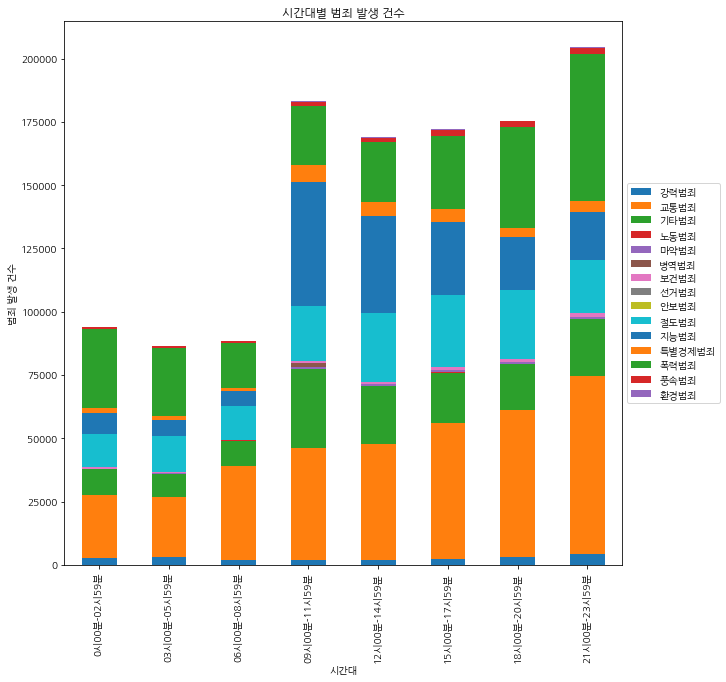

In [ ]:
hdf.plot(kind='bar', stacked='True',figsize=(10, 10))
plt.title('시간대별 범죄 발생 건수')
plt.xlabel('시간대')
plt.ylabel('범죄 발생 건수')

plt.legend(loc='center left', bbox_to_anchor=(1, 0.5)) # 범주 박스 위치 지정
plt.show()

In [ ]:
hdf2 = hdf

# pie차트를 그리기 위해 sum이라는 열을 추가하여 계산
hdf2['sum'] = hdf2['강력범죄']+hdf2['교통범죄']+hdf2['기타범죄']+hdf2['노동범죄']+hdf2['마약범죄']+hdf2['병역범죄']+hdf2['보건범죄']+hdf2['선거범죄']+hdf2['안보범죄']+hdf2['절도범죄']+hdf2['지능범죄']+hdf2['특별경제범죄']+hdf2['폭력범죄']+hdf2['풍속범죄']+hdf2['환경범죄']

hdf2

범죄대분류,강력범죄,교통범죄,기타범죄,노동범죄,마약범죄,병역범죄,보건범죄,선거범죄,안보범죄,절도범죄,지능범죄,특별경제범죄,폭력범죄,풍속범죄,환경범죄,sum
0시00분-02시59분,2920,24513,10376,20,244,3,596,0,2,13088,8393,1688,31290,920,42,94095
03시00분-05시59분,3316,23438,9184,41,214,1,404,1,0,14167,6637,1426,26880,709,53,86471
06시00분-08시59분,1977,37189,9935,80,151,20,140,22,0,13094,5971,1333,17572,887,117,88488
09시00분-11시59분,1799,44265,31337,124,635,1440,880,121,10,21501,49269,6702,23112,1582,458,183235
12시00분-14시59분,1966,45675,22841,125,773,285,694,53,18,27167,38231,5340,23919,1713,290,169090
15시00분-17시59분,2447,53506,20037,117,890,55,1009,34,10,28553,28941,4802,28939,2577,190,172107
18시00분-20시59분,3089,58164,18200,53,776,58,893,38,3,27229,20981,3768,39618,2543,90,175503
21시00분-23시59분,4215,70537,22421,78,674,19,1747,3,6,20568,19100,4320,57944,2750,126,204508


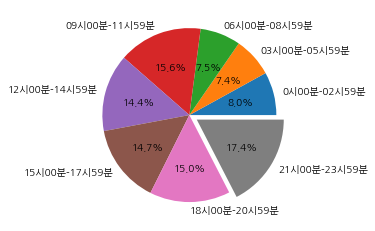

In [ ]:
explode = [0, 0, 0, 0, 0, 0, 0, 0.10] # '21시00분-23시59분'이 제일 높으므로 중앙에서 분리하여 강조

plt.pie(hdf2['sum'], labels=['0시00분-02시59분','03시00분-05시59분','06시00분-08시59분','09시00분-11시59분','12시00분-14시59분','15시00분-17시59분','18시00분-20시59분','21시00분-23시59분'],autopct='%.1f%%', explode=explode)
plt.show()

In [ ]:
# 지역별 범죄 발생 건수를 보기 위한 데이터 파일
adf = pd.read_csv('/content/areaCrime.csv',encoding='cp949')

adf2 = adf.groupby('범죄대분류').sum() # 데이터를 범죄 대분류로 묶어 15가지로 간결화

# merge하기 위해 지역별 열 병합 및 삭제
adf2['경기도'] = adf2['경기 고양']+adf2['경기 과천']+adf2['경기 광명']+adf2['경기 광주']+adf2['경기 구리']+adf2['경기 군포']+adf2['경기 김포']+adf2['경기 남양주']+adf2['경기 동두천']+adf2['경기 부천']+adf2['경기 성남']+adf2['경기 수원']+adf2['경기 시흥']+adf2['경기 안산']+adf2['경기 안성']+adf2['경기 안양']+adf2['경기 양주']+adf2['경기 여주']+adf2['경기 오산']+adf2['경기 용인']+adf2['경기 의왕']+adf2['경기 의정부']+adf2['경기 이천']+adf2['경기 파주']+adf2['경기 평택']+adf2['경기 포천']+adf2['경기 하남']+adf2['경기 화성']
adf2.drop(['경기 고양','경기 과천','경기 광명','경기 광주','경기 구리','경기 군포','경기 김포','경기 남양주','경기 동두천','경기 부천','경기 성남','경기 수원','경기 시흥','경기 안산','경기 안성','경기 안양','경기 양주','경기 여주','경기 오산','경기 용인','경기 의왕','경기 의정부','경기 이천','경기 파주','경기 평택','경기 포천','경기 하남','경기 화성'],axis=1,inplace=True)

adf2['강원도'] = adf2['강원 강릉']+adf2['강원 동해']+adf2['강원 삼척']+adf2['강원 속초']+adf2['강원 원주']+adf2['강원 춘천']+adf2['강원 태백']
adf2.drop(['강원 강릉','강원 동해','강원 삼척','강원 속초','강원 원주','강원 춘천','강원 태백'], axis=1, inplace=True)

adf2['충청북도'] = adf2['충북 제천']+adf2['충북 청주']+adf2['충북 충주']
adf2.drop(['충북 제천','충북 청주','충북 충주'], axis=1, inplace=True)

adf2['충청남도'] = adf2['충남 계룡']+adf2['충남 공주']+adf2['충남 논산']+adf2['충남 당진']+adf2['충남 보령']+adf2['충남 서산']+adf2['충남 아산']+adf2['충남 천안']
adf2.drop(['충남 계룡','충남 공주','충남 논산', '충남 당진', '충남 보령', '충남 서산', '충남 아산', '충남 천안'], axis=1, inplace=True)

adf2['전라북도'] = adf2['전북 군산']+adf2['전북 김제']+adf2['전북 남원']+adf2['전북 익산']+adf2['전북 전주']+adf2['전북 정읍']
adf2.drop(['전북 군산','전북 김제', '전북 남원', '전북 익산', '전북 전주', '전북 정읍'], axis=1, inplace=True)

adf2['전라남도'] = adf2['전남 광양']+adf2['전남 나주']+adf2['전남 목포']+adf2['전남 순천']+adf2['전남 여수']
adf2.drop(['전남 광양','전남 나주', '전남 목포', '전남 순천', '전남 여수'], axis=1, inplace=True)

adf2['경상북도'] = adf2['경북 경산']+adf2['경북 경주']+adf2['경북 구미']+adf2['경북 김천']+adf2['경북 문경']+adf2['경북 상주']+adf2['경북 안동']+adf2['경북 영주']+adf2['경북 영천']+adf2['경북 포항']
adf2.drop(['경북 경산','경북 경주','경북 구미','경북 김천','경북 문경','경북 상주','경북 안동','경북 영주','경북 영천','경북 포항'], axis=1, inplace=True)

adf2['경상남도'] = adf2['경남 거제']+adf2['경남 김해']+adf2['경남 마산']+adf2['경남 밀양']+adf2['경남 사천']+adf2['경남 양산']+adf2['경남 진주']+adf2['경남 창원']+adf2['경남 통영']
adf2.drop(['경남 거제','경남 김해', '경남 마산', '경남 밀양','경남 사천','경남 양산','경남 진주','경남 창원','경남 통영'], axis=1, inplace=True)

adf2['제주특별자치도'] = adf2['제주 서귀포']+adf2['제주 제주']
adf2.drop(['제주 서귀포', '제주 제주'], axis=1, inplace=True)

# 열 이름 변경
adf2.rename(columns={'서울':'서울특별시', '부산':'부산광역시', '대구':'대구광역시','인천':'인천광역시','광주':'광주광역시','대전':'대전광역시','울산':'울산광역시','세종':'세종특별자치시'}, inplace=True)

# 필요없는 열 삭제
adf2.drop(['기타도시','도시이외'], axis=1, inplace=True)

# 행, 열 전환
adf2 = adf2.transpose()

# 순서 변경
adf2 = adf2.reindex(['강원도', '경기도', '경상남도', '경상북도', '광주광역시', '대구광역시','대전광역시', '부산광역시', '서울특별시', '세종특별자치시', '울산광역시', '인천광역시', '전라남도', '전라북도', '제주특별자치도', '충청남도', '충청북도'])

# 인덱스로 사용하기 위한 열 추가
adf2['시도명'] = ['강원도', '경기도', '경상남도', '경상북도', '광주광역시', '대구광역시','대전광역시', '부산광역시', '서울특별시', '세종특별자치시', '울산광역시', '인천광역시', '전라남도', '전라북도', '제주특별자치도', '충청남도', '충청북도']

# 인덱스 설정
adf2.set_index('시도명',drop=True, inplace=True)

adf2

범죄대분류,강력범죄,교통범죄,기타범죄,노동범죄,마약범죄,병역범죄,보건범죄,선거범죄,안보범죄,절도범죄,지능범죄,특별경제범죄,폭력범죄,풍속범죄,환경범죄
시도명,,,,,,,,,,,,,,,
강원도,504,18416,4548,24,110,265,232,15,1,4699,5655,1307,8036,309,57
경기도,5815,141506,45409,243,1399,4595,3131,83,16,50522,71370,17679,71930,5306,1192
경상남도,1087,39954,11585,101,458,1067,735,70,5,14506,17259,2972,16055,865,306
경상북도,832,32309,7403,53,204,772,405,63,1,9456,11519,2400,11317,752,123
광주광역시,860,23412,5301,13,69,371,760,9,3,8438,9724,2535,9602,592,8
대구광역시,1084,39725,9766,31,393,800,417,18,4,12759,14195,3421,14708,1418,19
대전광역시,698,13556,4602,14,78,630,204,8,4,9495,9112,1635,8839,689,13
부산광역시,1774,35841,19868,190,759,959,1832,24,4,20136,25247,13868,20928,2085,198
서울특별시,6215,74958,41752,215,1360,4591,3941,24,38,55280,72851,22075,65247,6741,53


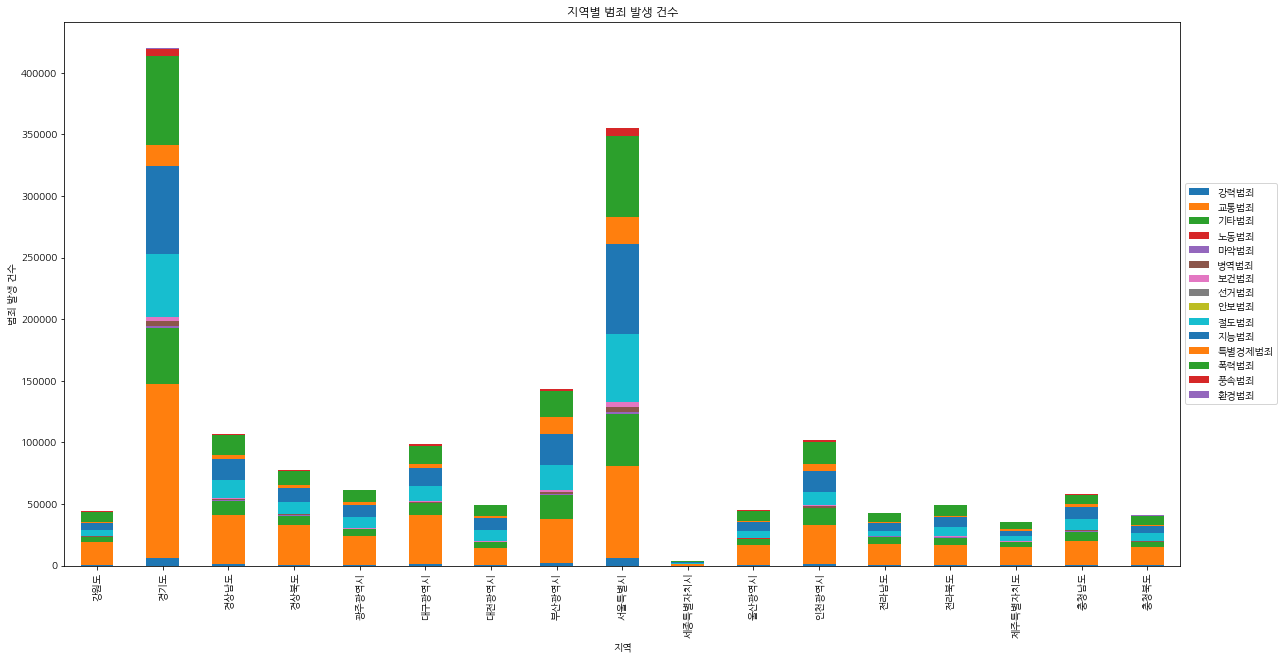

In [ ]:
adf2.plot(kind='bar', stacked='True',figsize=(20, 10))
plt.title('지역별 범죄 발생 건수')
plt.xlabel('지역')
plt.ylabel('범죄 발생 건수')

plt.legend(loc='center left', bbox_to_anchor=(1, 0.5)) # 범주 박스 위치 지정
plt.show()

In [ ]:
pdf = pd.read_csv('/content/local_population.csv',encoding='cp949',error_bad_lines=False)

# 인구수 별 범죄 발생 건수를 예측하기 위해 데이터 가공
pdf = pdf[['시도명','계']]

pdf.rename(columns={'계':'인구 수'}, inplace=True)

# 시도명으로 인구수 합계를 구함
pdf = pdf.groupby('시도명').sum()

pdf

/usr/local/lib/python3.8/dist-packages/IPython/core/interactiveshell.py:3326: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version.


  exec(code_obj, self.user_global_ns, self.user_ns)
b'Skipping line 5357: expected 231 fields, saw 332\n'
b'Skipping line 9306: expected 231 fields, saw 254\nSkipping line 11295: expected 231 fields, saw 400\n'


,인구 수
시도명,
강원도,3073726
경기도,14311395
경상남도,3282849
경상북도,2602052
광주광역시,1432049
대구광역시,2365620
대전광역시,1446749
부산광역시,3320276
서울특별시,9436846


In [ ]:
# 여러 범죄를 하나의 열로 더하여 병합
adf2['범죄 건수'] = adf2['강력범죄']+adf2['기타범죄'] +adf2['교통범죄']+adf2['노동범죄']+adf2['마약범죄']+adf2['병역범죄'] +adf2['보건범죄']+adf2['선거범죄']+adf2['안보범죄']+adf2['절도범죄']+adf2['지능범죄']+adf2['특별경제범죄']+adf2['폭력범죄']+adf2['풍속범죄']+adf2['환경범죄']
adf2.drop(['강력범죄','기타범죄', '교통범죄', '노동범죄', '마약범죄', '병역범죄', '보건범죄', '선거범죄', '안보범죄', '절도범죄', '지능범죄', '특별경제범죄', '폭력범죄', '풍속범죄', '환경범죄'], axis=1, inplace=True)

#인구 수가 있는 데이터 프레임과 범죄 건수가 있는 데이터 프레임 병합
addDf = pd.merge(adf2,pdf, how='outer', on='시도명')

addDf

,범죄 건수,인구 수
시도명,,
강원도,44178,3073726
경기도,420196,14311395
경상남도,107025,3282849
경상북도,77609,2602052
광주광역시,61697,1432049
대구광역시,98758,2365620
대전광역시,49577,1446749
부산광역시,143713,3320276
서울특별시,355341,9436846


기울기 :  [28.88479146]
절편 :  507019.77554519335
정확도 :  0.8977320064478264


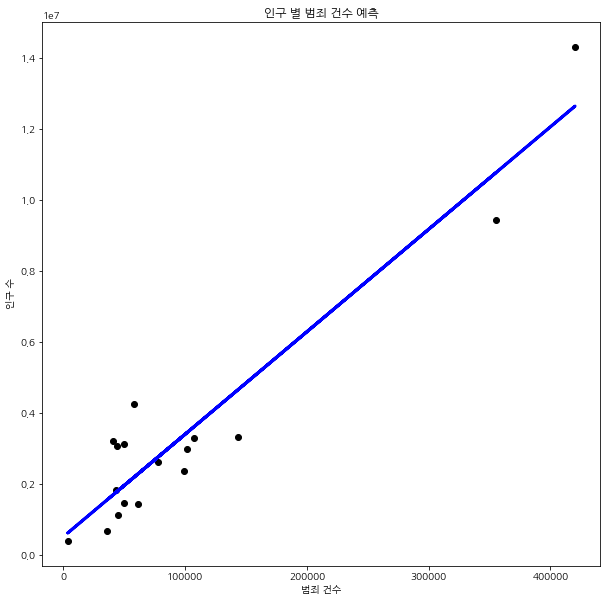

In [ ]:
# 선형 회귀
import matplotlib.pyplot as plt
from sklearn import linear_model

# 선형 회귀 모델을 생성
reg = linear_model.LinearRegression()

x = addDf['범죄 건수'].to_numpy()
y = addDf['인구 수'].to_numpy()

# 1차원 배열을 2차원 배열로 바꿈(1개씩 17개의 배열로 2차원 배열 생성)
x = x.reshape(17,1)

# x,y 값으로 학습
reg.fit(x, y)

print("기울기 : ", reg.coef_) # 직선의 기울기
print("절편 : ", reg.intercept_) # 직선의 y절편
print("정확도 : ", reg.score(x, y)) # 정확도

# 학습 데이터와 y 값을 산포도로 나타냄
plt.figure(figsize=(10,10)) # 그래프 크기 지정
plt.scatter(x, y, color='black')

# 학습 데이터를 입력으로 하여 예측값을 계산
y_pred = reg.predict(x)

# 학습 데이터와 예측값으로 선그래프로 그림
# 계산된 기울기와 y 절편을 가지는 직선이 그려짐
plt.plot(x, y_pred, color='blue', linewidth=3) 
plt.title('인구 별 범죄 건수 예측')
plt.xlabel('범죄 건수')
plt.ylabel('인구 수')
plt.show()